# Distribution of Failure Times

In this notebook, we investigate the distribution of failure times within a population of aging, complex networks and fit these distributions to a Gumbel-Weibull distribution for different model parameters.


Weibull Distribution PDF of failure times $x$:

$$ p(x; k, \lambda) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k}$$

### Trial run with the default parameters

In [1]:
from model import *
from ode_solver import *
from scipy.optimize import curve_fit

In [2]:
def get_failure_time (vitality, method='delta_2'):
    '''
    method = 'delta_2'
        Detect failure time as when subsequent delta_phi (i+1) is greater than 2 * delta_phi (i)
    method = 'threshold'
        Detect failure time as when phi < 0.4
    
    vitality [1D array-like] = array of phis
    '''
    if method == 'delta_2':
        # Compute deltas
        delta_phis = []
        for i in range(len(vitality)-1):
            delta_phis.append(vitality[i+1]-vitality[i])

        # Compute failure time
        fail_time = 0
        for k in np.arange(1,len(delta_phis)):
            if np.abs(delta_phis[k]) > np.abs(2*delta_phis[k-1]):
                fail_time = k
                break
    
    elif method == 'threshold':
        fail_time = 0
        for k in np.arange(len(vitality)):
            if vitality[k] < 0.4:
                fail_time = k
                break
            
    return (fail_time)

def weibull (x, k, lambd):
    '''
    Weibull PDF with parameters k and lambd
    '''
    p = k/lambd * (x/lambd) ** (k-1) * np.exp(-(x/lambd)**k)
    return (p)

def weibull_scalable (x, k, lambd, a):
    '''
    Weibull PDF with parameters k and lambd
    a is a scaling to help fit unnormalized probabilities
    '''
    p = a* (k/lambd * (x/lambd) ** (k-1) * np.exp(-(x/lambd)**k))
    return (p)


def weibull_fixed_k (x, lambd):
    '''
    Weibull PDF with parameters k and lambd
    '''
    k = 25
    p = k/lambd * (x/lambd) ** (k-1) * np.exp(-(x/lambd)**k)
    return (p)

In [ ]:
# Simulate N networks
N = 1000
vits = []

for n in range(N):
    vit, inter, ftime, cost = simIndividual(N=1000, p=0.1, d=0, f=0.025, r=0, f_thresh=0.01,
        graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
        costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
        node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
        P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5)
    vits.append(vit)

In [62]:
# compute failure times
fail_times = []
for vit in vits:
    ft = get_failure_time(vit, method='threshold')
    fail_times.append(ft)
    
np.savetxt('Data/failure_times/pop1000_N1000_p01_f0025_r0_Grand_I05.csv', np.array(fail_times), delimiter=',')

# Varying $f$, $r$, $N$, $p$

### $f=0.025$, $r \in [0,0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02]$, $N=1000$, $p=0.1$

In [5]:
f = 0.025
N = 1000
p = 0.1
for r in [0,0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02]:    
    # Simulate pop networks
    pop = 1000
    vits = []
    for n in range(pop):
        vit, inter, ftime, cost = simIndividual(N=N, p=p, d=0, f=f, r=r, f_thresh=0.01,
            graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
            costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
            node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
            P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,
                                               equilibrate_failures=True)
        vits.append(vit)
    # compute failure times
    fail_times = []
    for vit in vits:
        ft = get_failure_time(vit, method='threshold')
        fail_times.append(ft)
    np.savetxt('Data/failure_times/pop1000_N'+str(N)+'_p'+str(p)+'_f'+str(f)+'_r'+str(r)+'_Grand_I0.5.csv', np.array(fail_times), delimiter=',')

### $f \in [0.0075,0.01,0.0125,0.015,0.0175,0.02,0.025]$, $r=0$, $N=1000$, $p=0.1$

In [9]:
r = 0
N = 1000
p = 0.1
for f in [0.0075,0.01,0.0125,0.015,0.0175,0.02,0.025]:    
    # Simulate pop networks
    pop = 1000
    vits = []
    for n in range(pop):
        vit, inter, ftime, cost = simIndividual(N=N, p=p, d=0, f=f, r=r, f_thresh=0.01,
            graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
            costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
            node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
            P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,
                                               equilibrate_failures=True)
        vits.append(vit)
    # compute failure times
    fail_times = []
    for vit in vits:
        ft = get_failure_time(vit, method='threshold')
        fail_times.append(ft)
    np.savetxt('Data/failure_times/pop1000_N'+str(N)+'_p'+str(p)+'_f'+str(f)+'_r'+str(r)+'_Grand_I0.5.csv', np.array(fail_times), delimiter=',')

### $f = 0.025$, $r=0$, $N \in [20,50,100,300,500,700,1000,2000,5000]$, $p=0.1$

In [ ]:
r = 0
f = 0.025
p = 0.1
for N in [20,50,100,300,500,700,1000]:#,2000,5000]:    
    # Simulate pop networks
    pop = 1000
    vits = []
    for n in range(pop):
        vit, inter, ftime, cost = simIndividual(N=N, p=p, d=0, f=f, r=r, f_thresh=0.01,
            graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
            costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
            node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
            P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,
                                               equilibrate_failures=True)
        vits.append(vit)
    # compute failure times
    fail_times = []
    for vit in vits:
        ft = get_failure_time(vit, method='threshold')
        fail_times.append(ft)
    np.savetxt('Data/failure_times/pop1000_N'+str(N)+'_p'+str(p)+'_f'+str(f)+'_r'+str(r)+'_Grand_I0.5.csv', np.array(fail_times), delimiter=',')

### $f =0.025$, $r=0$, $N=1000$, $p\in [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225]$

In [39]:
r = 0
f = 0.025
N = 1000
for p in [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225]:    
    # Simulate pop networks
    pop = 1000
    vits = []
    for n in range(pop):
        vit, inter, ftime, cost = simIndividual(N=N, p=p, d=0, f=f, r=r, f_thresh=0.01,
            graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
            costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
            node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
            P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,
                                               equilibrate_failures=True)
        vits.append(vit)
    # compute failure times
    fail_times = []
    for vit in vits:
        ft = get_failure_time(vit, method='threshold')
        fail_times.append(ft)
    np.savetxt('Data/failure_times/pop1000_N'+str(N)+'_p'+str(p)+'_f'+str(f)+'_r'+str(r)+'_Grand_I0.5.csv', np.array(fail_times), delimiter=',')

# Figure 1E and 1F: Distribution of failure times and Weibull parameters as a function of $f$

### Vary $f$ with $\alpha=10$, $r=0.01$

In [6]:
r = 0.01
N = 1000
p = 0.1
alpha = 10
d = 0
gamma = 0
T = 100
for f in [0.0075,0.01,0.0125,0.015,0.0175,0.02,0.025]:   
    # Simulate pop networks
    pop = 1000
    vits = []
    # calculate switching times for optimal repair protocol
    t1 = 1/f*np.log((1-d)/(1-alpha*(f+r+gamma)))
    t2 = T-t1
    # simulate networks
    for n in range(pop):
        vit, inter, ftime, cost = simIndividual(N=N, p=p, d=0, f=f, r=r, f_thresh=0.01,
            graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
            costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
            node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
            P_ablate=0,costablate=1,ablate_type='constant',repair_start=int(round(t1)),repair_end=int(round(t2)),delay=0,time_end=T,dependency=0.5,
                                               equilibrate_failures=True)
        vits.append(vit)
    # compute failure times
    fail_times = []
    for vit in vits:
        ft = get_failure_time(vit, method='threshold')
        fail_times.append(ft)
    np.savetxt('Data/failure_times/OPT_pop1000_N'+str(N)+'_p'+str(p)+'_f'+str(f)+'_r'+str(r)+'_Grand_I0.5.csv', np.array(fail_times), delimiter=',')

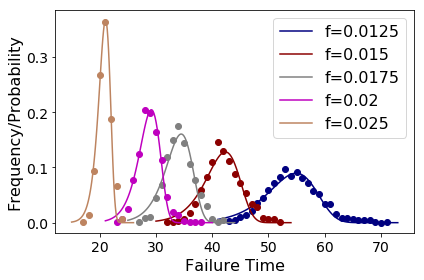

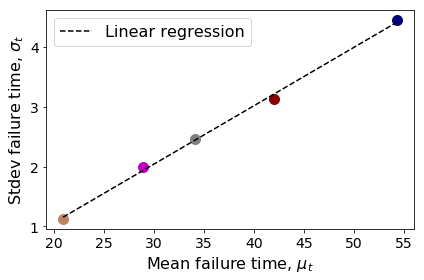

Obs. slope = 0.0975


In [9]:
savename='failureOPT'
k_list = []
lambda_list = []
plot = True
colors = ['#000080', '#8B0000', '#808080', 'm', '#BD8460']

f_vals = [0.0125,0.015,0.0175,0.02,0.025] # 0.0025,0.005,0.0075,0.01 removed due to exceeding T=100
fail_time_files = ['OPT_pop1000_N1000_p0.1_f'+str(f)+'_r0.01_Grand_I0.5' for f in f_vals]

# Mean and Stdev
means = []
stdevs = []

a_k_lamb_guess = [[10, 55], [10, 40], [10, 35], [10, 30], [10, 20], [10, 10]]

for idx, fn in enumerate(fail_time_files):

    fail_times = np.genfromtxt('Data/failure_times/'+fn+'.csv', delimiter=',')
    stdevs.append(np.std(fail_times))
    means.append(np.mean(fail_times))
    
    # Get normalized frequencies "probs"
    x = np.arange(min(fail_times),max(fail_times)+1,1)
    counts  = []
    total = 0
    for xx in x:
        ct = np.count_nonzero(np.array(fail_times) == xx)
        counts.append(ct)
        total += ct

    probs = np.array(counts)/total
    
    # Fit with curve_fit()
    popt, pcov = curve_fit(weibull, x, probs, p0=np.array(a_k_lamb_guess[idx]))
    k_list.append(popt[0])
    lambda_list.append(popt[1])
    
    if plot is True:
        x_space = np.linspace(min(x)-2,max(x)+2,100)
        plt.plot(x,probs,marker='o',color=colors[idx],linewidth=0)
        plt.plot(x_space,weibull(x_space,popt[0],popt[1]),color=colors[idx],label='f='+str(f_vals[idx]))
        plt.legend(loc='best', fontsize=16)
        
if plot is True:
    plt.ylabel('Frequency/Probability',fontsize=16)
    plt.xlabel('Failure Time',fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=14)
    plt.tight_layout()
    plt.savefig('Figures/failure_time_distributions/'+savename+'varyF_all_fitted.png',dpi=800)
    plt.show()
    
if plot is True:
    for i in range(len(means)):
        plt.plot(means[i], stdevs[i], 'o', color=colors[i], markersize=10)
    plt.xlabel(r'Mean failure time, $\mu_t$',fontsize=16)
    plt.ylabel(r'Stdev failure time, $\sigma_t$',fontsize=16)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(np.array(means).reshape(-1,1), np.array(stdevs).reshape(-1,1))
    #plt.annotate('Slope = '+str(round(reg.coef_[0][0],4)), xy=(0.65,0.1), xycoords='axes fraction', fontsize=16)
    plt.plot(np.array(means), reg.coef_[0][0]*np.array(means)+np.ones(len(means))*reg.intercept_[0], 'k--',label='Linear regression')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=14)
    plt.legend(loc='best',fontsize=16)
    plt.tight_layout()
    plt.savefig('Figures/failure_time_distributions/'+savename+'_mean_vs_stdev.png',dpi=800)
    plt.show()
    
    
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(means).reshape(-1,1), np.array(stdevs).reshape(-1,1))
print ('Obs. slope = '+str(round(reg.coef_[0][0],4)))

# Figure 1D: Failure time distributions under repair; Repair extends survival

Plot figure of vitality trajectories with an accompanying histoplot of the failure time distribution

In [66]:
# Simulate with r=0.025 for greater visual separation on plot
r = 0.025
N = 1000
p = 0.1
alpha = 10
d = 0
gamma = 0
T = 100
f = 0.025    

# Simulate pop networks
pop = 1000
vits = []
# calculate switching times for optimal repair protocol
#t1 = 1/f*np.log((1-d)/(1-alpha*(f+r+gamma)))
#t2 = T-t1
# simulate networks
for n in range(pop):
    vit, inter, ftime, cost = simIndividual(N=N, p=p, d=0, f=f, r=r, f_thresh=0.01,
        graph_type='Grandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
        costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
        node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
        P_ablate=0,costablate=1,ablate_type='constant',repair_start=10,repair_end=30,delay=0,time_end=T,dependency=0.5,
                                           equilibrate_failures=True)
    vits.append(vit)
# compute failure times
fail_times = []
for vit in vits:
    ft = get_failure_time(vit, method='threshold')
    fail_times.append(ft)
np.savetxt('Data/failure_times/10_30_OPT_pop1000_N'+str(N)+'_p'+str(p)+'_f'+str(f)+'_r'+str(r)+'_Grand_I0.5.csv', np.array(fail_times), delimiter=',')

In [6]:
# read in failure time data
fail_times_none = np.genfromtxt('Data/failure_times/pop1000_N1000_p0.1_f0.025_r0_Grand_I0.5.csv', delimiter=',')
fail_times_opt = np.genfromtxt('Data/failure_times/10_30_OPT_pop1000_N1000_p0.1_f0.025_r0.025_Grand_I0.5.csv', delimiter=',')

# Get normalized frequencies "probs"
x_none = np.arange(min(fail_times_none),max(fail_times_none)+1,1)
counts  = []
total = 0
for xx in x_none:
    ct = np.count_nonzero(np.array(fail_times_none) == xx)
    counts.append(ct)
    total += ct
probs_none = np.array(counts)/total

x_opt = np.arange(min(fail_times_opt),max(fail_times_opt)+1,1)
counts  = []
total = 0
for xx in x_opt:
    ct = np.count_nonzero(np.array(fail_times_opt) == xx)
    counts.append(ct)
    total += ct
probs_opt = np.array(counts)/total

# Fit with curve_fit()
popt, pcov = curve_fit(weibull_scalable, x_none, probs_none)
k_none = popt[0]
lamb_none = popt[1]
a_none = popt[2]
popt, pcov = curve_fit(weibull_scalable, x_opt, probs_opt, p0=[4,40,4])
k_opt = popt[0]
lamb_opt = popt[1]
a_opt = popt[2]

C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in power


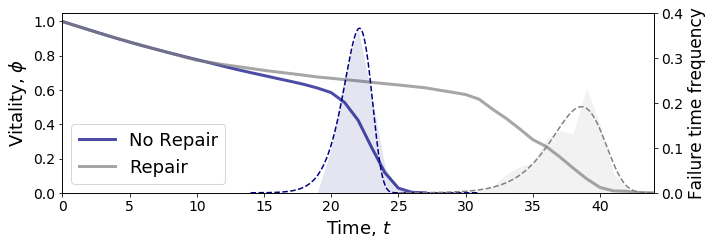

In [14]:
no_rep = np.genfromtxt('Data/Gilbert7abinary_Grandom_s_none_N1000_p0.1_d0_f0.025_r0_MEAN.csv', delimiter=',')[0,:]
rep = np.genfromtxt('Data/Gilbert7cbinary_Grandom_s_none_N1000_p0.1_d0_f0.025_r0.025_MEAN.csv', delimiter=',')[0,:]
time_no = np.arange(0,len(no_rep),1)
time = np.arange(0,len(rep),1)
fig, ax1 = plt.subplots(figsize=(10,3.5))
ax1.plot(time_no, no_rep, color='#000080', alpha=0.7, linewidth=3.0, label='No Repair')
ax1.plot(time, rep, color='#808080', alpha=0.7, linewidth=3.0, label='Repair')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_xlabel("Time, $t$", fontsize=18)
ax1.set_ylabel("Vitality, $\phi$", fontsize=18)
ax1.set_ylim([0,1.05])
ax1.set_xlim([0, max(time)+0.05])
ax1.legend(loc='lower left',fontsize=18)

ax2 = ax1.twinx()
ax2.fill_between(x_none, probs_none, np.zeros(len(probs_none)), color='#000080', alpha=0.1, linewidth=0.25)
ax2.plot(np.linspace(x_none[0],x_none[-1],1000), weibull_scalable(np.linspace(x_none[0],x_none[-1],1000),k_none,lamb_none,a_none), '--', color='#000080')
ax2.fill_between(x_opt, probs_opt, np.zeros(len(probs_opt)), color='#808080', alpha=0.1, linewidth=0.25)
ax2.plot(np.linspace(x_opt[0],x_opt[-1],1000), weibull_scalable(np.linspace(x_opt[0],x_opt[-1],1000),k_opt,lamb_opt,a_opt), '--', color='#808080')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.set_ylabel("Failure time frequency", fontsize=17)
ax2.set_ylim([0,0.4])

plt.tight_layout()
plt.savefig('Figures/Fail_Time_Vit_Hist.png', dpi=800)
plt.show()